# Base de datos SDSS: galaxias

## Distribución de índices de color

El color de una galaxia está, en promedio, bien correlacionado con su tipo estructural (e.g., Holmberg 1958; deVaucouleurs 1961a). Las espirales tempranas, Sa y SO; y las elípticas son los sistemas más rojos mientras que las espirales tardías, Sc, y las irregulares de tipo I son las más azules. Esta correlación refleja las variaciones de la función relativa espectro-luminosidad, así como la cantidad y distribución de la materia intragaláctica en galaxias de diferentes tipos estructurales (Chester & Roberts, 1964).
<img src="galaxyzoo_spiral+elliptical.jpeg" alt="Drawing" style="width: 400px;"/>

Strateva et al. 2001 presentan un análisis de datos del Sloan Digital Sky Survey (SDSS) y muestran que la distribución de color u*-r* de su muestra es bimodal y que las galaxias pueden dividirse en submuestras "azules" y "rojas", como se esperaba en función de las diferencias en las poblaciones estelares dominantes para los distintos tipos morfológicos de galaxias.
<img src="strateva.png" alt="Drawing" style="width: 400px;"/>

Utilizan esquemas de clasificación morfológica independientes para mostrar que las galaxias azules están efectivamente dominadas por tipos tardíos (espirales) mientras que las galaxias rojas están dominadas por tipos tempranos (elípticas - arriba FIG. 4 del paper).
 Su estudio indica que las galaxias tienen una distribución de color bimodal u*-r* correspondiente a tipos morfológicos tempranos (E, S0 y Sa) y tardíos (Sb, Sc e Irr).
 
Filtros espectrales del SDSS:
<img src="filtersSDSS.jpg" alt="Drawing" style="width: 500px;"/>

Tomando los datos del Sky Survey, uso el siguiente Query para generar la muestra de galaxias, aprovechando el gran volumen de datos disponibles tomo las galaxias clasificadas como espirales o elípticas por más del 95% de los votos, con *redshift* hasta 0.5:

`SELECT `
`  p.specobjid, p.petroMag_u, p.petroMag_g, p.petroMag_r,`
`  o.p_el_debiased, o.p_cs_debiased, q.z`
    
`FROM    PhotoPrimary AS p`
`  JOIN zooSpec AS o  ON p.objid = o.objid`
`  JOIN Photoz AS q ON p.objid = q.objid`

`WHERE`
`  q.z BETWEEN 0 and 0.5`
`  AND (o.p_el_debiased > 0.95 OR o.p_cs_debiased > 0.95)`
  
 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
dt = pd.read_csv('galaxy_short.csv')
dt2 = pd.read_csv('galaxy_long.csv')

In [3]:
sp = dt[dt['p_cs_debiased']>0.9]
el = dt[dt['p_el_debiased']>0.9]
g_re = el['petroMag_g']-el['petroMag_r']
u_ge = el['petroMag_u']-el['petroMag_g']
g_rs = sp['petroMag_g']-sp['petroMag_r']
u_gs = sp['petroMag_u']-sp['petroMag_g']

In [4]:
sp2 = dt2[dt2['p_cs_debiased']>0.9]
el2 = dt2[dt2['p_el_debiased']>0.9]
g_re2 = el2['petroMag_g']-el2['petroMag_r']
u_ge2 = el2['petroMag_u']-el2['petroMag_g']
g_rs2 = sp2['petroMag_g']-sp2['petroMag_r']
u_gs2 = sp2['petroMag_u']-sp2['petroMag_g']

Someto a una prueba de hipótesis la afirmación de que las distribuciones de color $g-r$ y $u-g$ para las galaxias de tipo morfológico espirales y elípticas son iguales.
Para evaluar la hipótesis nula uso el método de Kolmogorov-Smirnov que permite comparar dos muestras de distinto tamaño y no necesita realizar un bineado. El estadístico de prueba de este método es el módulo máximo de la diferencia entre las funciones acumuladas de ambas muestras:  
$d_{max} = max\{|F_1(x)-F_2(x)|\}$

Usando el test provisto por *scipy.stats* obtengo el valor-p, que me da el nivel de significancia mínimo para el cual puedo rechazar la hipótesis nula.

In [5]:
st.ks_2samp(u_gs2,u_ge2)[1]

0.0

El valor-p para el estadístico de KS es $0.0$ Por lo tanto según este estadístico ambas distribuciones son distintas con un nivel de confianza del 100%.
Abajo las funciones acumuladas para cada caso:

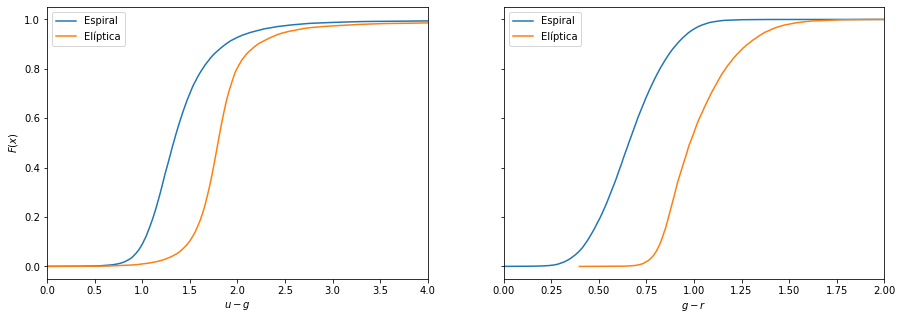

In [6]:
uge_cum= u_ge2.sort_values().reset_index(drop=True)
ugs_cum= u_gs2.sort_values().reset_index(drop=True)
gre_cum= g_re2.sort_values().reset_index(drop=True)
grs_cum= g_rs2.sort_values().reset_index(drop=True)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
ax1.plot(ugs_cum.values, (ugs_cum.index+1)/len(ugs_cum+1),label='Espiral')
ax1.plot(uge_cum.values, (uge_cum.index+1)/len(uge_cum+1),label='Elíptica')
ax2.plot(grs_cum.values, (grs_cum.index+1)/len(grs_cum+1),label='Espiral')
ax2.plot(gre_cum.values, (gre_cum.index+1)/len(gre_cum+1),label='Elíptica')
ax2.legend()
ax1.legend()
ax1.set_xlim(0,4)
ax2.set_xlim(0,2)
ax1.set_xlabel('$u-g$')
ax2.set_xlabel('$g-r$')
ax1.set_ylabel('$F(x)$')
plt.show()

## Distribución de tipos morfológicos

La distribución de tipos morfológicos de galaxias no es uniforme. La imagen corresponde a la Fig.1 del trabajo de Javanmardi & Kroupa (2017) que muestra la distribución morfológica de galaxias de la base de datos HyperLeda
<img src="javanmardi.png" alt="Drawing" style="width: 400px;"/>

Para probar esto me baso en la hipótesis nula de que la distribución de tipos morfológicos es uniforme y evalúo la hipótesis con el estadístico $\chi^2$
Abajo el gráfico de la distribución de la muetra y la esperada:

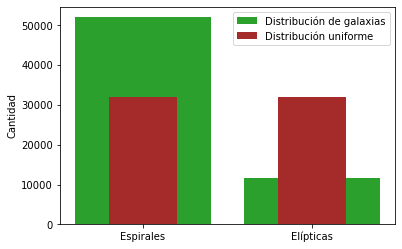

In [7]:
gal = np.array([sp2.shape[0],el2.shape[0]])
uni = np.array([0.5,0.5])*(sp2.shape[0]+el2.shape[0])
plt.bar(['Espirales','Elípticas'],gal,color='tab:green', label='Distribución de galaxias')
plt.bar(['Espirales','Elípticas'],uni,color='brown', width=0.4,label='Distribución uniforme')
plt.legend()
plt.ylabel('Cantidad')
plt.show()

Aplico el test de Chi-cuadrado y se ve con una certeza del 100% que estas distribuciones son distintas, ya que el valor-p es 0 de nuevo:

In [8]:
print(f'El valor-p es: {st.chisquare(gal,uni)[1]}')

El valor-p es: 0.0


## Correlación magnitud g vs. r

Para calcular la relación lineal entre las magnitudes aparentes g y r para galaxias elípticas y espirales utilizo el método de cuadrados mínimos que dada una base de funciones linealmente independientes $f_j(x)$ busca la combinación lineal de ellas $f(x)=\sum_jc_jf_j(x)$ que minimíza el error cuadrado

$S_c(f)= \sum_k \frac{(y_k-f(x_k))^2}{n}$,
donde $\{x_k,y_k\}$ son los pares de datos medidos. 

En este caso la función $f(x) = ax+b$ y queremos obtener los coeficientes $a_0,b_0$ tales que $\frac{\partial S_c}{\partial a} = \frac{\partial S_c}{\partial b}=0$. Este cálculo se encuentra implementado en la función `st.linregress`

In [9]:
gs = sp2['petroMag_g']
ge = el2['petroMag_g']
rs = sp2['petroMag_r']
re = el2['petroMag_r']

a_0s, b_0s, rs_val, ps_val, std_err = st.linregress(rs, gs)
a_0e, b_0e, re_val, pe_val, std_err = st.linregress(re, ge)
print(rs_val,re_val)

0.9825017876787164 0.9897471521060968


Dado que los coeficientes de correlación dan bastante cercanos a 1 vemos que el ajuste es bueno. Quitando outliers probablemente el coeficiente mejoraría más.

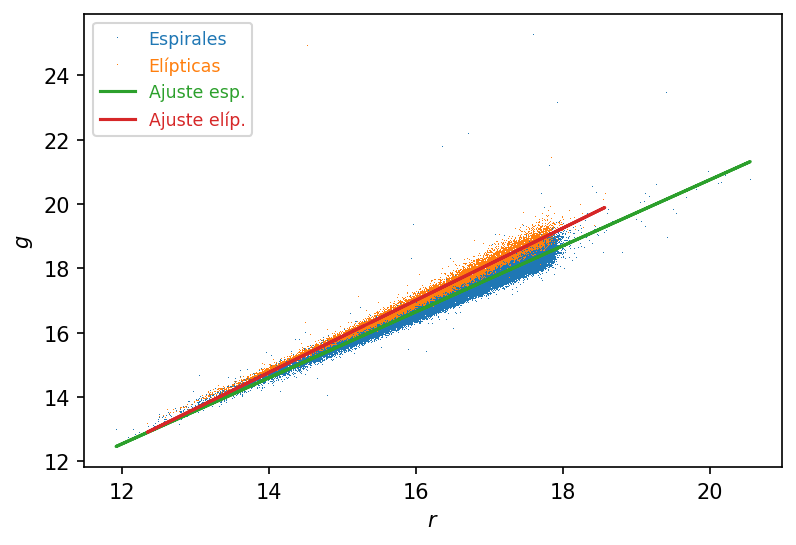

In [10]:
plt.figure(dpi=150)
plt.plot(rs,gs,',',label='Espirales')
plt.plot(re,ge,',',label='Elípticas')
plt.plot(rs,a_0s*rs+b_0s,label='Ajuste esp.')
plt.plot(re,a_0e*re+b_0e,label='Ajuste elíp.')
plt.xlabel('$r$')
plt.ylabel('$g$')
leg = plt.legend(fontsize='small')
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
plt.show()

## Magnitud absoluta respecto al *redshift*

In [11]:
c = 3e5
H = 75 
z = dt2['z'][dt2['petroMag_r']<17.5].sort_values().reset_index(drop=True)
r = dt2['petroMag_r'][dt2['petroMag_r']<17.5].reset_index(drop=True)
M = r-25-5*np.log10(c*z/H)
Men = 17.5 -25-5*np.log10(c*z/H)
zs = sp2['z'][sp2['petroMag_r']< 17.5]
ze = el2['z'][el2['petroMag_r']< 17.5]
Ms = (rs[sp2['petroMag_r']< 17.5]-25-5*np.log10(c*zs/H))
Me = re[el2['petroMag_r']< 17.5]-25-5*np.log10(c*ze/H)

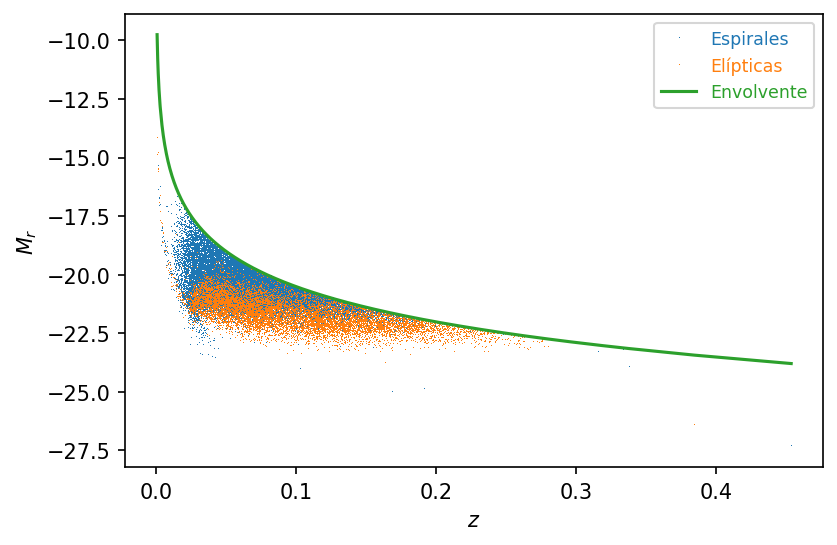

In [12]:
plt.figure(dpi=150)
plt.plot(zs,Ms,',', label='Espirales')
plt.plot(ze,Me,',',label='Elípticas')
plt.plot(z,Men, label='Envolvente')
plt.xlabel('$z$')
plt.ylabel('$M_r$')
leg = plt.legend(fontsize='small')
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
plt.show()

Dada la relación, dependiente del *redshift*, para estimar la magnitud absoluta se produce una envolvente para cada corte en la magnitud aparente $r$. Esta envolvente la podemos calcular como $M_{en} = 17.5 -25-5 log_{10}\frac{c z}{H}$ para $m_r<17.5$. Podemos ver si el modelo analítico es realmente el que mejor ajusta a los datos que forman la envolvente. Hago los cortes en $0.02<z<0.15$ porque la cantidad de datos para *redshift* menores y mayores es muy bajo y no hay puntos que alcancen la envolvente fuera de ese rango de $z$, empeorando el ajuste.

In [13]:
def M_fun(x, mag):
    c = 3e5
    H = 75 
    return mag-25-5*np.log10(c*x/H)

In [14]:
z_bin = st.binned_statistic(z[(z>0.02)&(z<0.15)], M[(z>0.02)&(z<0.15)], statistic='max', bins=100).bin_edges
M_max = st.binned_statistic(z[(z>0.02)&(z<0.15)], M[(z>0.02)&(z<0.15)], statistic='max', bins=100).statistic

from scipy.optimize import curve_fit
init_val = 17.5  # for [amp, cen, wid]
best_val, covar = curve_fit(M_fun, z_bin[:-1], M_max, p0=init_val)
print(f'best_val: {best_val}')

best_val: [17.48251027]


Grafico la diferencia absoluta entre los puntos máximos de los datos y la envolvente teórica o el mejor ajuste. 

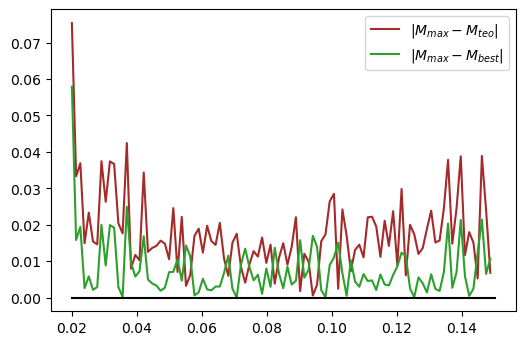

In [15]:
plt.figure(dpi=100)
plt.plot(z_bin[:-1],np.abs(M_max-M_fun(z_bin[:-1],17.5)),c='brown',label='$|M_{max}-M_{teo}|$')
plt.plot(z_bin[:-1],np.abs(M_max-M_fun(z_bin[:-1],best_val)),c='tab:green',label='$|M_{max}-M_{best}|$')
plt.plot([0.02,0.15],[0,0],c='k')
plt.legend()
plt.show()